# How do I use axis parameters in Pandas

In [1]:
import pandas as pd

In [2]:
drinks=pd.read_csv('http://bit.ly/drinksbycountry')

In [3]:
drinks.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,Asia
1,Albania,89,132,54,4.9,Europe
2,Algeria,25,0,14,0.7,Africa
3,Andorra,245,138,312,12.4,Europe
4,Angola,217,57,45,5.9,Africa


In [4]:
type(drinks)

pandas.core.frame.DataFrame

In [5]:
drinks.drop('continent',axis=1).head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
0,Afghanistan,0,0,0,0.0
1,Albania,89,132,54,4.9
2,Algeria,25,0,14,0.7
3,Andorra,245,138,312,12.4
4,Angola,217,57,45,5.9


In [6]:
drinks.drop(2,axis=0).head(3)

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,Asia
1,Albania,89,132,54,4.9,Europe
3,Andorra,245,138,312,12.4,Europe


In [7]:
drinks.mean()
# default axis for mean is column mean...default is axis=0 for mean
# drinks.mean()=drinks.mean(axis=0)

beer_servings                   106.160622
spirit_servings                  80.994819
wine_servings                    49.450777
total_litres_of_pure_alcohol      4.717098
dtype: float64

In [ ]:
drinks.mean(axis=0)
# drinks.mean(axis=None)
# drinks.mean()
# drinks.mean(axis='index')
# This all are same
# this means default is for axis=0 ie row axis...



# QUESTION: Why it is summing the columns when in fact we are giving axis=0 or default axis? I mean in drop method, if we do axis=0 row is dropped and if we do axis=1 then column is dropped.
# ANSWER: The logic behind this is that the mean operation is doing mean across row in axis=0 ie it will compress all rows and IT IS MOVING ALONG THE ROW AXIS
# SAME WAY IN COLUMN AXIS, ie AXIS=1, IT WILL MOVE ALONG COLUMN and it will sum whole row....


In [22]:
# drinks.mean(axis=1).head(10)
drinks.mean(axis='columns').head(10)

0      0.000
1     69.975
2      9.925
3    176.850
4     81.225
5     69.975
6    111.825
7     53.700
8    138.850
9    138.675
dtype: float64

# HOW TO USE STRING METHODS IN PANDAS?

In [23]:
'hello'.upper()

'HELLO'

In [24]:
orders=pd.read_table('http://bit.ly/chiporders')

In [25]:
orders.head()

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98


In [27]:
orders.item_name.str.upper().head(5)

0             CHIPS AND FRESH TOMATO SALSA
1                                     IZZE
2                         NANTUCKET NECTAR
3    CHIPS AND TOMATILLO-GREEN CHILI SALSA
4                             CHICKEN BOWL
Name: item_name, dtype: object

In [31]:
orders.item_name.str.contains('Chicken').head(5)

0    False
1    False
2    False
3    False
4     True
Name: item_name, dtype: bool

In [32]:
orders[orders.item_name.str.contains('Chicken')].head(5)

,order_id,quantity,item_name,choice_description,item_price
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
11,6,1,Chicken Crispy Tacos,"[Roasted Chili Corn Salsa, [Fajita Vegetables,...",$8.75
12,6,1,Chicken Soft Tacos,"[Roasted Chili Corn Salsa, [Rice, Black Beans,...",$8.75
13,7,1,Chicken Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",$11.25


In [35]:
orders.choice_description.str.replace('[','').str.replace(']','').head(7)

0                                                  NaN
1                                           Clementine
2                                                Apple
3                                                  NaN
4    Tomatillo-Red Chili Salsa (Hot), Black Beans, ...
5    Fresh Tomato Salsa (Mild), Rice, Cheese, Sour ...
6                                                  NaN
Name: choice_description, dtype: object

# How I change Data TYpe of Pandas Series

In [6]:
import pandas as pd
drinks=pd.read_csv('http://bit.ly/drinksbycountry')
drinks.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,Asia
1,Albania,89,132,54,4.9,Europe
2,Algeria,25,0,14,0.7,Africa
3,Andorra,245,138,312,12.4,Europe
4,Angola,217,57,45,5.9,Africa


In [7]:
drinks.dtypes

country                          object
beer_servings                     int64
spirit_servings                   int64
wine_servings                     int64
total_litres_of_pure_alcohol    float64
continent                        object
dtype: object

In [8]:
drinks['beer_servings']=drinks.beer_servings.astype(float)

In [9]:
drinks.beer_servings.dtype

dtype('float64')

In [10]:
type(drinks.beer_servings)

pandas.core.series.Series

In [11]:
type(drinks)

pandas.core.frame.DataFrame

In [12]:
drinks.dtypes

country                          object
beer_servings                   float64
spirit_servings                   int64
wine_servings                     int64
total_litres_of_pure_alcohol    float64
continent                        object
dtype: object

In [13]:
# before this spirit servings was int64  and now it would be float
import pandas as pd
drinks=pd.read_csv('http://bit.ly/drinksbycountry',dtype={'spirit_servings':float})
drinks.dtypes

country                          object
beer_servings                     int64
spirit_servings                 float64
wine_servings                     int64
total_litres_of_pure_alcohol    float64
continent                        object
dtype: object

In [36]:
import pandas as pd
orders=pd.read_table('http://bit.ly/chiporders')


In [37]:
orders.head()


,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98


In [28]:
orders.dtypes

order_id               int64
quantity               int64
item_name             object
choice_description    object
item_price            object
dtype: object

In [29]:
orders.item_price=orders.item_price.str.replace('$','').astype(float)


In [30]:
orders.head()


,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,2.39
1,1,1,Izze,[Clementine],3.39
2,1,1,Nantucket Nectar,[Apple],3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",16.98


In [31]:
orders.dtypes

order_id                int64
quantity                int64
item_name              object
choice_description     object
item_price            float64
dtype: object

# How do I read a tabular data file into panda

In [33]:
import pandas as pd

In [35]:
pd.read_table('http://bit.ly/chiporders')
# by default read_table reads file which is tab seperated
# read_table needs tab seperated file and this chiporders file is indeed tab seperated

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,3,1,Side of Chips,NaN,$1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25


In [39]:
pd.read_table('http://bit.ly/movieusers').head()

,1|24|M|technician|85711
0,2|53|F|other|94043
1,3|23|M|writer|32067
2,4|24|M|technician|43537
3,5|33|F|other|15213
4,6|42|M|executive|98101


In [41]:
user_cols=['user_id','age','gender','occupation','zipcode']
pd.read_table('http://bit.ly/movieusers',sep='|',header=None,names=user_cols).head()

,user_id,age,gender,occupation,zipcode
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213



# How do I select a pandas Series from a DataFrame

In [42]:
import pandas as pd

In [46]:
# ufo=pd.read_table('http://bit.ly/uforeports',sep=',')
ufo=pd.read_csv('http://bit.ly/uforeports')
ufo.head()

,City,Colors Reported,Shape Reported,State,Time
0,Ithaca,NaN,TRIANGLE,NY,6/1/1930 22:00
1,Willingboro,NaN,OTHER,NJ,6/30/1930 20:00
2,Holyoke,NaN,OVAL,CO,2/15/1931 14:00
3,Abilene,NaN,DISK,KS,6/1/1931 13:00
4,New York Worlds Fair,NaN,LIGHT,NY,4/18/1933 19:00


In [47]:
type(ufo)

pandas.core.frame.DataFrame

In [49]:
ufo['City'].head()

0                  Ithaca
1             Willingboro
2                 Holyoke
3                 Abilene
4    New York Worlds Fair
Name: City, dtype: object

In [50]:
type(ufo['City'])

pandas.core.series.Series

In [51]:
ufo.City.head(3)

0         Ithaca
1    Willingboro
2        Holyoke
Name: City, dtype: object

In [52]:
type(ufo.City.head(3))

pandas.core.series.Series

In [53]:
# ufo['Colors Reported']
'ab'+'cd'

'abcd'

In [57]:
ufo.Location=ufo.City+', '+ufo.State
ufo.head(2)
# ufo.Location will not be reflected in our original dataframe 

,City,Colors Reported,Shape Reported,State,Time
0,Ithaca,NaN,TRIANGLE,NY,6/1/1930 22:00
1,Willingboro,NaN,OTHER,NJ,6/30/1930 20:00


In [58]:
ufo['Location']=ufo.City+', '+ufo.State

In [61]:
ufo.head(2)

,City,Colors Reported,Shape Reported,State,Time,Location
0,Ithaca,NaN,TRIANGLE,NY,6/1/1930 22:00,"Ithaca, NY"
1,Willingboro,NaN,OTHER,NJ,6/30/1930 20:00,"Willingboro, NJ"


# Why do some pandas commands end with () and other commands dont

In [1]:
import pandas as pd

In [2]:
movies=pd.read_csv('http://bit.ly/imdbratings')
movies.head(2)

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"


In [3]:
movies.shape

(979, 6)

In [4]:
movies.dtypes

star_rating       float64
title              object
content_rating     object
genre              object
duration            int64
actors_list        object
dtype: object

In [5]:
movies.describe()

,star_rating,duration
count,979.000000,979.000000
mean,7.889785,120.979571
std,0.336069,26.218010
min,7.400000,64.000000
25%,7.600000,102.000000
50%,7.800000,117.000000
75%,8.100000,134.000000
max,9.300000,242.000000


In [6]:
type(movies)

pandas.core.frame.DataFrame

In [7]:
# methods are action oriented and attributes are description oriented
# utsav.age or utsav.height ....utsav.eat() or utsav.workout()

In [8]:
movies.describe(include=['object'])

,title,content_rating,genre,actors_list
count,979,976,979,979
unique,975,12,16,969
top,Les Miserables,R,Drama,"[u'Daniel Radcliffe', u'Emma Watson', u'Rupert..."
freq,2,460,278,6



# shift+tab inside any method  to get a split screen describing that method

# How do I rename DataFrame Columns

In [9]:
import pandas as pd


In [10]:
ufo=pd.read_csv('http://bit.ly/uforeports')
ufo.head()

,City,Colors Reported,Shape Reported,State,Time
0,Ithaca,NaN,TRIANGLE,NY,6/1/1930 22:00
1,Willingboro,NaN,OTHER,NJ,6/30/1930 20:00
2,Holyoke,NaN,OVAL,CO,2/15/1931 14:00
3,Abilene,NaN,DISK,KS,6/1/1931 13:00
4,New York Worlds Fair,NaN,LIGHT,NY,4/18/1933 19:00


In [11]:
ufo.columns

Index(['City', 'Colors Reported', 'Shape Reported', 'State', 'Time'], dtype='object')

In [12]:
ufo.rename(columns={'City':'TheCity','Shape Reported':'Shape___Reported'},inplace=True)

In [13]:
ufo.columns

Index(['TheCity', 'Colors Reported', 'Shape___Reported', 'State', 'Time'], dtype='object')

In [14]:
ufo_cols=['city','colors reported','shape reported','state','time']
ufo.columns=ufo_cols

In [15]:
ufo.columns

Index(['city', 'colors reported', 'shape reported', 'state', 'time'], dtype='object')

In [16]:
ufo=pd.read_csv('http://bit.ly/uforeports',names=ufo_cols) 


In [17]:
ufo.head()

,city,colors reported,shape reported,state,time
0,City,Colors Reported,Shape Reported,State,Time
1,Ithaca,NaN,TRIANGLE,NY,6/1/1930 22:00
2,Willingboro,NaN,OTHER,NJ,6/30/1930 20:00
3,Holyoke,NaN,OVAL,CO,2/15/1931 14:00
4,Abilene,NaN,DISK,KS,6/1/1931 13:00


In [18]:
ufo.columns

Index(['city', 'colors reported', 'shape reported', 'state', 'time'], dtype='object')

In [19]:
ufo.columns=ufo.columns.str.replace(' ','_')

In [20]:
ufo.columns

Index(['city', 'colors_reported', 'shape_reported', 'state', 'time'], dtype='object')

In [21]:
type(ufo.columns.str)

pandas.core.strings.StringMethods

In [22]:
type(ufo.columns)

pandas.core.indexes.base.Index

# How do I remove columns from a Pandas DataFrame?

In [2]:
import pandas as pd

In [3]:
ufo=pd.read_csv('http://bit.ly/uforeports')
ufo.head(2)

,City,Colors Reported,Shape Reported,State,Time
0,Ithaca,NaN,TRIANGLE,NY,6/1/1930 22:00
1,Willingboro,NaN,OTHER,NJ,6/30/1930 20:00


In [4]:
ufo.shape

(18241, 5)

In [5]:
ufo.drop('Colors Reported',axis=1)
ufo.head(2)
# This wont affect the dataframe . To make this affect in Data Frame do inplace=TRUE

,City,Colors Reported,Shape Reported,State,Time
0,Ithaca,NaN,TRIANGLE,NY,6/1/1930 22:00
1,Willingboro,NaN,OTHER,NJ,6/30/1930 20:00


In [6]:
ufo.drop('Colors Reported',axis=1,inplace=True)

In [7]:
ufo.head(2)

,City,Shape Reported,State,Time
0,Ithaca,TRIANGLE,NY,6/1/1930 22:00
1,Willingboro,OTHER,NJ,6/30/1930 20:00


In [8]:
ufo.drop(['City','State'],axis=1,inplace=True)
ufo.head(3)

,Shape Reported,Time
0,TRIANGLE,6/1/1930 22:00
1,OTHER,6/30/1930 20:00
2,OVAL,2/15/1931 14:00


In [9]:
print("before dropping the rows:  ",ufo.shape)
ufo.drop([0,1],axis=0,inplace=True)
# axis=0 is default
print(ufo.head(3))
print("after dropping the rows:  ",ufo.shape)

before dropping the rows:   (18241, 2)
  Shape Reported             Time
2           OVAL  2/15/1931 14:00
3           DISK   6/1/1931 13:00
4          LIGHT  4/18/1933 19:00
after dropping the rows:   (18239, 2)


In [10]:
ufo.head()
print("hello")

hello


# How do I sort a Pandas DataFrame or Series

In [11]:
import pandas as pd

In [12]:
movies = pd.read_csv("http://bit.ly/imdbratings")

In [13]:
movies.head(3)

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."


In [15]:
movies.title.sort_values().head()

542     (500) Days of Summer
5               12 Angry Men
201         12 Years a Slave
698                127 Hours
110    2001: A Space Odyssey
Name: title, dtype: object

In [17]:
movies['title'].sort_values().head()

542     (500) Days of Summer
5               12 Angry Men
201         12 Years a Slave
698                127 Hours
110    2001: A Space Odyssey
Name: title, dtype: object

In [19]:
type(movies['title'].sort_values())

pandas.core.series.Series

In [20]:
movies['title'].sort_values(ascending=False).head()

864               [Rec]
526                Zulu
615          Zombieland
677              Zodiac
955    Zero Dark Thirty
Name: title, dtype: object

In [22]:
movies.sort_values('title').head()
# if we want to display whole data frame

,star_rating,title,content_rating,genre,duration,actors_list
542,7.8,(500) Days of Summer,PG-13,Comedy,95,"[u'Zooey Deschanel', u'Joseph Gordon-Levitt', ..."
5,8.9,12 Angry Men,NOT RATED,Drama,96,"[u'Henry Fonda', u'Lee J. Cobb', u'Martin Bals..."
201,8.1,12 Years a Slave,R,Biography,134,"[u'Chiwetel Ejiofor', u'Michael Kenneth Willia..."
698,7.6,127 Hours,R,Adventure,94,"[u'James Franco', u'Amber Tamblyn', u'Kate Mara']"
110,8.3,2001: A Space Odyssey,G,Mystery,160,"[u'Keir Dullea', u'Gary Lockwood', u'William S..."


In [24]:
movies.sort_values(['content_rating','duration']).head(5)
# multiple sorting.. first we are sorting by content_rating and then we are sorting by duration

,star_rating,title,content_rating,genre,duration,actors_list
713,7.6,The Jungle Book,APPROVED,Animation,78,"[u'Phil Harris', u'Sebastian Cabot', u'Louis P..."
513,7.8,Invasion of the Body Snatchers,APPROVED,Horror,80,"[u'Kevin McCarthy', u'Dana Wynter', u'Larry Ga..."
272,8.1,The Killing,APPROVED,Crime,85,"[u'Sterling Hayden', u'Coleen Gray', u'Vince E..."
703,7.6,Dracula,APPROVED,Horror,85,"[u'Bela Lugosi', u'Helen Chandler', u'David Ma..."
612,7.7,A Hard Day's Night,APPROVED,Comedy,87,"[u'John Lennon', u'Paul McCartney', u'George H..."


# How do I filter rows of a pandas DataFrame by column value

In [25]:
import pandas as pd

In [26]:
movies=pd.read_csv('http://bit.ly/imdbratings')
movies.head()

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."


In [29]:
movies.shape

(979, 6)

In [31]:
type(False)

bool

In [32]:
booleans=[]
for length in movies.duration:
    if length<200:
        booleans.append(False)
    else:
        booleans.append(True)
        

In [34]:
booleans[:5]

[False, False, True, False, False]

In [37]:
len(booleans)

979

In [38]:
is_long=pd.Series(booleans)

In [39]:
is_long.head()

0    False
1    False
2     True
3    False
4    False
dtype: bool

In [44]:
movies[is_long].head(10)
# only those movies which have 200+ minutes duration
# we are passing series of true and false 

,star_rating,title,content_rating,genre,duration,actors_list
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
7,8.9,The Lord of the Rings: The Return of the King,PG-13,Adventure,201,"[u'Elijah Wood', u'Viggo Mortensen', u'Ian McK..."
17,8.7,Seven Samurai,UNRATED,Drama,207,"[u'Toshir\xf4 Mifune', u'Takashi Shimura', u'K..."
78,8.4,Once Upon a Time in America,R,Crime,229,"[u'Robert De Niro', u'James Woods', u'Elizabet..."
85,8.4,Lawrence of Arabia,PG,Adventure,216,"[u""Peter O'Toole"", u'Alec Guinness', u'Anthony..."
142,8.3,Lagaan: Once Upon a Time in India,PG,Adventure,224,"[u'Aamir Khan', u'Gracy Singh', u'Rachel Shell..."
157,8.2,Gone with the Wind,G,Drama,238,"[u'Clark Gable', u'Vivien Leigh', u'Thomas Mit..."
204,8.1,Ben-Hur,G,Adventure,212,"[u'Charlton Heston', u'Jack Hawkins', u'Stephe..."
445,7.9,The Ten Commandments,APPROVED,Adventure,220,"[u'Charlton Heston', u'Yul Brynner', u'Anne Ba..."
476,7.8,Hamlet,PG-13,Drama,242,"[u'Kenneth Branagh', u'Julie Christie', u'Dere..."


In [45]:
is_long2=movies.duration>=200
is_long2.head()

0    False
1    False
2     True
3    False
4    False
Name: duration, dtype: bool

In [47]:
 movies[movies.duration>=200].head()

,star_rating,title,content_rating,genre,duration,actors_list
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
7,8.9,The Lord of the Rings: The Return of the King,PG-13,Adventure,201,"[u'Elijah Wood', u'Viggo Mortensen', u'Ian McK..."
17,8.7,Seven Samurai,UNRATED,Drama,207,"[u'Toshir\xf4 Mifune', u'Takashi Shimura', u'K..."
78,8.4,Once Upon a Time in America,R,Crime,229,"[u'Robert De Niro', u'James Woods', u'Elizabet..."
85,8.4,Lawrence of Arabia,PG,Adventure,216,"[u""Peter O'Toole"", u'Alec Guinness', u'Anthony..."


In [48]:
 movies[movies.duration>=200].genre.head()

2         Crime
7     Adventure
17        Drama
78        Crime
85    Adventure
Name: genre, dtype: object

In [49]:
 movies[movies.duration>=200]['genre'].head()

2         Crime
7     Adventure
17        Drama
78        Crime
85    Adventure
Name: genre, dtype: object

In [50]:
movies.loc[movies.duration>=200,'genre'].head()
# first argument is the rows and the second argument is the columns

2         Crime
7     Adventure
17        Drama
78        Crime
85    Adventure
Name: genre, dtype: object

# How do I apply multiple filter criteria to a Pandas DataFrame

In [56]:
import pandas as pd

In [57]:
movies=pd.read_csv('http://bit.ly/imdbratings')
movies.head()

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."


In [58]:
movies[movies.duration>=200].head()

,star_rating,title,content_rating,genre,duration,actors_list
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
7,8.9,The Lord of the Rings: The Return of the King,PG-13,Adventure,201,"[u'Elijah Wood', u'Viggo Mortensen', u'Ian McK..."
17,8.7,Seven Samurai,UNRATED,Drama,207,"[u'Toshir\xf4 Mifune', u'Takashi Shimura', u'K..."
78,8.4,Once Upon a Time in America,R,Crime,229,"[u'Robert De Niro', u'James Woods', u'Elizabet..."
85,8.4,Lawrence of Arabia,PG,Adventure,216,"[u""Peter O'Toole"", u'Alec Guinness', u'Anthony..."


In [60]:
movies[(movies.duration>=200) & (movies.genre=='Drama')].head()

,star_rating,title,content_rating,genre,duration,actors_list
17,8.7,Seven Samurai,UNRATED,Drama,207,"[u'Toshir\xf4 Mifune', u'Takashi Shimura', u'K..."
157,8.2,Gone with the Wind,G,Drama,238,"[u'Clark Gable', u'Vivien Leigh', u'Thomas Mit..."
476,7.8,Hamlet,PG-13,Drama,242,"[u'Kenneth Branagh', u'Julie Christie', u'Dere..."


In [61]:
movies[(movies.duration>=200) | (movies.genre=='Drama')].head()

,star_rating,title,content_rating,genre,duration,actors_list
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
5,8.9,12 Angry Men,NOT RATED,Drama,96,"[u'Henry Fonda', u'Lee J. Cobb', u'Martin Bals..."
7,8.9,The Lord of the Rings: The Return of the King,PG-13,Adventure,201,"[u'Elijah Wood', u'Viggo Mortensen', u'Ian McK..."
9,8.9,Fight Club,R,Drama,139,"[u'Brad Pitt', u'Edward Norton', u'Helena Bonh..."
13,8.8,Forrest Gump,PG-13,Drama,142,"[u'Tom Hanks', u'Robin Wright', u'Gary Sinise']"


In [65]:
[(movies.duration>=200) & (movies.genre=='Drama')]

[0      False
 1      False
 2      False
 3      False
 4      False
 5      False
 6      False
 7      False
 8      False
 9      False
 10     False
 11     False
 12     False
 13     False
 14     False
 15     False
 16     False
 17      True
 18     False
 19     False
 20     False
 21     False
 22     False
 23     False
 24     False
 25     False
 26     False
 27     False
 28     False
 29     False
        ...  
 949    False
 950    False
 951    False
 952    False
 953    False
 954    False
 955    False
 956    False
 957    False
 958    False
 959    False
 960    False
 961    False
 962    False
 963    False
 964    False
 965    False
 966    False
 967    False
 968    False
 969    False
 970    False
 971    False
 972    False
 973    False
 974    False
 975    False
 976    False
 977    False
 978    False
 Length: 979, dtype: bool]

In [66]:
movies[(movies.genre=='Drama') | (movies.genre=='Drama') | (movies.genre=='Action')].head(10)

,star_rating,title,content_rating,genre,duration,actors_list
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
5,8.9,12 Angry Men,NOT RATED,Drama,96,"[u'Henry Fonda', u'Lee J. Cobb', u'Martin Bals..."
9,8.9,Fight Club,R,Drama,139,"[u'Brad Pitt', u'Edward Norton', u'Helena Bonh..."
11,8.8,Inception,PG-13,Action,148,"[u'Leonardo DiCaprio', u'Joseph Gordon-Levitt'..."
12,8.8,Star Wars: Episode V - The Empire Strikes Back,PG,Action,124,"[u'Mark Hamill', u'Harrison Ford', u'Carrie Fi..."
13,8.8,Forrest Gump,PG-13,Drama,142,"[u'Tom Hanks', u'Robin Wright', u'Gary Sinise']"
16,8.7,One Flew Over the Cuckoo's Nest,R,Drama,133,"[u'Jack Nicholson', u'Louise Fletcher', u'Mich..."
17,8.7,Seven Samurai,UNRATED,Drama,207,"[u'Toshir\xf4 Mifune', u'Takashi Shimura', u'K..."
19,8.7,Star Wars,PG,Action,121,"[u'Mark Hamill', u'Harrison Ford', u'Carrie Fi..."
20,8.7,The Matrix,R,Action,136,"[u'Keanu Reeves', u'Laurence Fishburne', u'Car..."


In [68]:
# To simplify above step in a simple step, we will use Series method isin()
type(movies.genre)

pandas.core.series.Series

# MOST IMPORTANT CONCEPT: COLUMN OF DATA FRAME IS SERIES example: movies.genre is Series where genre is column and movies is DataFrame

In [74]:
# print("type is : ",type(movies.genre.isin(['Crime','Drama','Action'])))

movies[movies.genre.isin(['Crime','Drama','Action'])].head(7)

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."
5,8.9,12 Angry Men,NOT RATED,Drama,96,"[u'Henry Fonda', u'Lee J. Cobb', u'Martin Bals..."
9,8.9,Fight Club,R,Drama,139,"[u'Brad Pitt', u'Edward Norton', u'Helena Bonh..."


In [75]:
import pandas as pd


# What about reading from csv files only from two columns and ignoring others. What is the fastest method to read from a csv file. How to define type of csv file before actually reading the csv

In [80]:
import pandas as pd

In [81]:
ufo=pd.read_csv('http://bit.ly/uforeports')
ufo.columns

Index(['City', 'Colors Reported', 'Shape Reported', 'State', 'Time'], dtype='object')

In [83]:
ufo=pd.read_csv('http://bit.ly/uforeports',usecols=['City','State'])
ufo.columns

Index(['City', 'State'], dtype='object')

In [84]:
ufo=pd.read_csv('http://bit.ly/uforeports',usecols=[0,3])

In [85]:
ufo.columns

Index(['City', 'State'], dtype='object')

In [86]:
ufo=pd.read_csv('http://bit.ly/uforeports',nrows=3)
ufo

,City,Colors Reported,Shape Reported,State,Time
0,Ithaca,NaN,TRIANGLE,NY,6/1/1930 22:00
1,Willingboro,NaN,OTHER,NJ,6/30/1930 20:00
2,Holyoke,NaN,OVAL,CO,2/15/1931 14:00


# This nrows=3 will read in first three rows and then program flow comes back. IN case of large DataSets of GB's , nrows would be a good option to check the first three rows instead of scanning WHOLE DATAFRAME

# How do DataFrames and Series work with regard to selecting individual entries and iteration

In [88]:
for c in ufo.City:
    print(c)

Ithaca
Willingboro
Holyoke


In [91]:
for index,row in ufo.iterrows():
    print(index,row.City,row.State)
#     iterrows()- It lets us iterate through all the rows in Data Frame
# iterrows()is a generator that iterates over the rows of the dataframe and returns the index of each row,
# in addition to an object containing the row itself.

0 Ithaca NY
1 Willingboro NJ
2 Holyoke CO


In [98]:
print(ufo.iterrows())
print("##############################")

for x,y in ufo.iterrows():
    print("X is :",x)
    
    print("Y is :",y)
    print("type of y is : ",type(y))
    print("#######################################################################")
    print("#######################################################################")

<generator object DataFrame.iterrows at 0x000002526D0771A8>
##############################
X is : 0
Y is : City                       Ithaca
Colors Reported               NaN
Shape Reported           TRIANGLE
State                          NY
Time               6/1/1930 22:00
Name: 0, dtype: object
type of y is :  <class 'pandas.core.series.Series'>
#######################################################################
#######################################################################
X is : 1
Y is : City                   Willingboro
Colors Reported                NaN
Shape Reported               OTHER
State                           NJ
Time               6/30/1930 20:00
Name: 1, dtype: object
type of y is :  <class 'pandas.core.series.Series'>
#######################################################################
#######################################################################
X is : 2
Y is : City                       Holyoke
Colors Reported                NaN
Shape Re

In [97]:
import pandas as pd

# How to drop every non numeric columns from a DataFrame

In [99]:
drinks=pd.read_csv('http://bit.ly/drinksbycountry')

In [100]:
drinks.dtypes

country                          object
beer_servings                     int64
spirit_servings                   int64
wine_servings                     int64
total_litres_of_pure_alcohol    float64
continent                        object
dtype: object

In [101]:
import numpy as np
drinks.select_dtypes(include=[np.number]).dtypes

beer_servings                     int64
spirit_servings                   int64
wine_servings                     int64
total_litres_of_pure_alcohol    float64
dtype: object

In [103]:
drinks.select_dtypes(include=[np.number]).head(5)

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
0,0,0,0,0.0
1,89,132,54,4.9
2,25,0,14,0.7
3,245,138,312,12.4
4,217,57,45,5.9


In [104]:
drinks.describe()

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
count,193.000000,193.000000,193.000000,193.000000
mean,106.160622,80.994819,49.450777,4.717098
std,101.143103,88.284312,79.697598,3.773298
min,0.000000,0.000000,0.000000,0.000000
25%,20.000000,4.000000,1.000000,1.300000
50%,76.000000,56.000000,8.000000,4.200000
75%,188.000000,128.000000,59.000000,7.200000
max,376.000000,438.000000,370.000000,14.400000


In [105]:
drinks.describe(include=['object','float'])

,country,total_litres_of_pure_alcohol,continent
count,193,193.000000,193
unique,193,NaN,6
top,Gambia,NaN,Africa
freq,1,NaN,53
mean,NaN,4.717098,NaN
std,NaN,3.773298,NaN
min,NaN,0.000000,NaN
25%,NaN,1.300000,NaN
50%,NaN,4.200000,NaN
75%,NaN,7.200000,NaN


In [106]:
drinks.describe(include=['object'])

,country,continent
count,193,193
unique,193,6
top,Gambia,Africa
freq,1,53


# When should i use a groupby in pandas

In [107]:
import pandas as pd

In [109]:
drinks=pd.read_csv('http://bit.ly/drinksbycountry')

In [110]:
drinks.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,Asia
1,Albania,89,132,54,4.9,Europe
2,Algeria,25,0,14,0.7,Africa
3,Andorra,245,138,312,12.4,Europe
4,Angola,217,57,45,5.9,Africa


In [111]:
drinks.beer_servings.mean()

106.16062176165804

In [112]:
drinks.groupby('continent').beer_servings.mean()

continent
Africa            61.471698
Asia              37.045455
Europe           193.777778
North America    145.434783
Oceania           89.687500
South America    175.083333
Name: beer_servings, dtype: float64

In [113]:
drinks[drinks.continent=='Africa'].head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
2,Algeria,25,0,14,0.7,Africa
4,Angola,217,57,45,5.9,Africa
18,Benin,34,4,13,1.1,Africa
22,Botswana,173,35,35,5.4,Africa
26,Burkina Faso,25,7,7,4.3,Africa


In [114]:
drinks[drinks.continent=='Africa'].beer_servings.mean()

61.471698113207545

In [117]:
drinks.groupby('continent').beer_servings.agg(['count','min','max','mean'])

,count,min,max,mean
continent,,,,
Africa,53,0,376,61.471698
Asia,44,0,247,37.045455
Europe,45,0,361,193.777778
North America,23,1,285,145.434783
Oceania,16,0,306,89.687500
South America,12,93,333,175.083333


In [122]:
drinks.groupby('continent').beer_servings.sum()
# GROUPBY is always used with some entity (of datatype object) in common and accordingly using other numeric column and visualizing means and all

continent
Africa           3258
Asia             1630
Europe           8720
North America    3345
Oceania          1435
South America    2101
Name: beer_servings, dtype: int64

In [123]:
drinks.groupby('continent').mean()

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
continent,,,,
Africa,61.471698,16.339623,16.264151,3.007547
Asia,37.045455,60.840909,9.068182,2.170455
Europe,193.777778,132.555556,142.222222,8.617778
North America,145.434783,165.739130,24.521739,5.995652
Oceania,89.687500,58.437500,35.625000,3.381250
South America,175.083333,114.750000,62.416667,6.308333


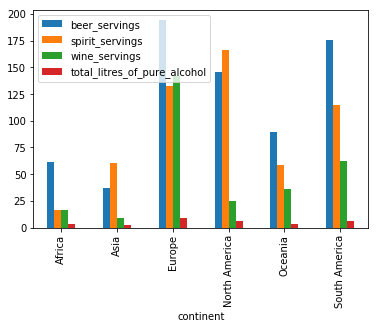

In [124]:
%matplotlib inline
drinks.groupby('continent').mean().plot(kind='bar')

# How do I explore a Series

In [125]:
import pandas as pd

In [126]:
movies=pd.read_csv('http://bit.ly/imdbratings')

In [127]:
movies.head()

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."


In [129]:
movies.dtypes

star_rating       float64
title              object
content_rating     object
genre              object
duration            int64
actors_list        object
dtype: object

In [130]:
movies.genre.describe()

count       979
unique       16
top       Drama
freq        278
Name: genre, dtype: object

In [131]:
movies.genre.value_counts()

Drama        278
Comedy       156
Action       136
Crime        124
Biography     77
Adventure     75
Animation     62
Horror        29
Mystery       16
Western        9
Thriller       5
Sci-Fi         5
Film-Noir      3
Family         2
History        1
Fantasy        1
Name: genre, dtype: int64

In [134]:
movies.genre.value_counts(normalize=True)

Drama        0.283963
Comedy       0.159346
Action       0.138917
Crime        0.126660
Biography    0.078652
Adventure    0.076609
Animation    0.063330
Horror       0.029622
Mystery      0.016343
Western      0.009193
Thriller     0.005107
Sci-Fi       0.005107
Film-Noir    0.003064
Family       0.002043
History      0.001021
Fantasy      0.001021
Name: genre, dtype: float64

In [135]:
movies.genre.unique()

array(['Crime', 'Action', 'Drama', 'Western', 'Adventure', 'Biography',
       'Comedy', 'Animation', 'Mystery', 'Horror', 'Film-Noir', 'Sci-Fi',
       'History', 'Thriller', 'Family', 'Fantasy'], dtype=object)

In [136]:
movies.genre.nunique()

16

In [138]:
pd.crosstab(movies.genre,movies.content_rating)
# cross tabulation

content_rating,APPROVED,G,GP,NC-17,NOT RATED,PASSED,PG,PG-13,R,TV-MA,UNRATED,X
genre,,,,,,,,,,,,
Action,3,1,1,0,4,1,11,44,67,0,3,0
Adventure,3,2,0,0,5,1,21,23,17,0,2,0
Animation,3,20,0,0,3,0,25,5,5,0,1,0
Biography,1,2,1,0,1,0,6,29,36,0,0,0
Comedy,9,2,1,1,16,3,23,23,73,0,4,1
Crime,6,0,0,1,7,1,6,4,87,0,11,1
Drama,12,3,0,4,24,1,25,55,143,1,9,1
Family,0,1,0,0,0,0,1,0,0,0,0,0
Fantasy,0,0,0,0,0,0,0,0,1,0,0,0


In [139]:
movies.duration.describe()

count    979.000000
mean     120.979571
std       26.218010
min       64.000000
25%      102.000000
50%      117.000000
75%      134.000000
max      242.000000
Name: duration, dtype: float64

In [140]:
movies.duration.mean()

120.97957099080695

In [147]:
movies.duration.value_counts().tail()
# if we have categorical data, then valuecounts is most useful


180    1
177    1
168    1
166    1
64     1
Name: duration, dtype: int64

In [148]:
%matplotlib inline

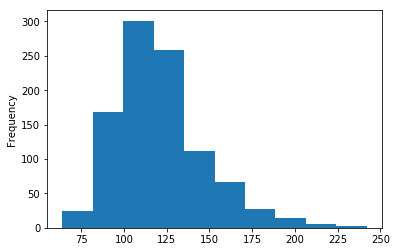

In [149]:
movies.duration.plot(kind='hist')

In [153]:
# movies.genre.plot(kind='bar')-->would not work
movies.genre.value_counts()
# movies.genre.value_counts().plot(kind='bar')-->will work

Drama        278
Comedy       156
Action       136
Crime        124
Biography     77
Adventure     75
Animation     62
Horror        29
Mystery       16
Western        9
Thriller       5
Sci-Fi         5
Film-Noir      3
Family         2
History        1
Fantasy        1
Name: genre, dtype: int64

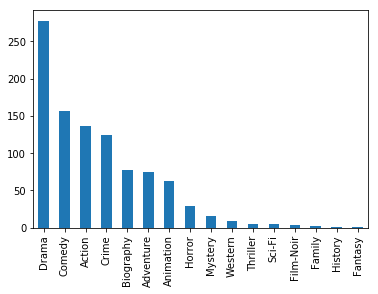

In [155]:
movies.genre.value_counts().plot(kind='bar')
# here hist wont work!!!

## How do I handle missing values in Pandas

In [156]:
import pandas as pd

In [157]:
ufo=pd.read_csv('http://bit.ly/uforeports')

In [159]:
ufo.head()

,City,Colors Reported,Shape Reported,State,Time
0,Ithaca,NaN,TRIANGLE,NY,6/1/1930 22:00
1,Willingboro,NaN,OTHER,NJ,6/30/1930 20:00
2,Holyoke,NaN,OVAL,CO,2/15/1931 14:00
3,Abilene,NaN,DISK,KS,6/1/1931 13:00
4,New York Worlds Fair,NaN,LIGHT,NY,4/18/1933 19:00


In [160]:
ufo.tail()

,City,Colors Reported,Shape Reported,State,Time
18236,Grant Park,NaN,TRIANGLE,IL,12/31/2000 23:00
18237,Spirit Lake,NaN,DISK,IA,12/31/2000 23:00
18238,Eagle River,NaN,NaN,WI,12/31/2000 23:45
18239,Eagle River,RED,LIGHT,WI,12/31/2000 23:45
18240,Ybor,NaN,OVAL,FL,12/31/2000 23:59


In [161]:
ufo.isnull().tail()

,City,Colors Reported,Shape Reported,State,Time
18236,False,True,False,False,False
18237,False,True,False,False,False
18238,False,True,True,False,False
18239,False,False,False,False,False
18240,False,True,False,False,False


In [163]:
type(ufo.isnull())

pandas.core.frame.DataFrame

In [164]:
ufo.notnull().tail()

,City,Colors Reported,Shape Reported,State,Time
18236,True,False,True,True,True
18237,True,False,True,True,True
18238,True,False,False,True,True
18239,True,True,True,True,True
18240,True,False,True,True,True


In [165]:
ufo.isnull().sum()

City                  25
Colors Reported    15359
Shape Reported      2644
State                  0
Time                   0
dtype: int64

In [166]:
pd.Series([True,False,True])

0     True
1    False
2     True
dtype: bool

In [167]:
pd.Series([True,False,True]).sum()
# no of true are returned

2

In [169]:
ufo[ufo.City.isnull()].head()

,City,Colors Reported,Shape Reported,State,Time
21,NaN,NaN,NaN,LA,8/15/1943 0:00
22,NaN,NaN,LIGHT,LA,8/15/1943 0:00
204,NaN,NaN,DISK,CA,7/15/1952 12:30
241,NaN,BLUE,DISK,MT,7/4/1953 14:00
613,NaN,NaN,DISK,NV,7/1/1960 12:00


In [171]:
ufo.shape

(18241, 5)

In [173]:
ufo.dropna().shape

(2486, 5)

In [6]:
import pandas as pd

In [7]:
ufo=pd.read_csv('http://bit.ly/uforeports')

In [8]:
ufo.head()

,City,Colors Reported,Shape Reported,State,Time
0,Ithaca,NaN,TRIANGLE,NY,6/1/1930 22:00
1,Willingboro,NaN,OTHER,NJ,6/30/1930 20:00
2,Holyoke,NaN,OVAL,CO,2/15/1931 14:00
3,Abilene,NaN,DISK,KS,6/1/1931 13:00
4,New York Worlds Fair,NaN,LIGHT,NY,4/18/1933 19:00


In [10]:
ufo.shape

(18241, 5)

In [11]:
ufo.dropna(how='any').shape

(2486, 5)

In [13]:
ufo.dropna(how='all').shape
# only drop a row if all of its values are missing ie NaN

(18241, 5)

In [14]:
ufo.dropna(subset=['City','Shape Reported'],how='any').shape
# if any of those two are missing, drop the row

(15576, 5)

In [15]:
ufo.dropna(subset=['City','Shape Reported'],how='all').shape
# only 4 rows gets droped .. only 4 rows where both are NaN

(18237, 5)

In [16]:
ufo['Shape Reported'].value_counts()

LIGHT        2803
DISK         2122
TRIANGLE     1889
OTHER        1402
CIRCLE       1365
SPHERE       1054
FIREBALL     1039
OVAL          845
CIGAR         617
FORMATION     434
VARIOUS       333
RECTANGLE     303
CYLINDER      294
CHEVRON       248
DIAMOND       234
EGG           197
FLASH         188
TEARDROP      119
CONE           60
CROSS          36
DELTA           7
ROUND           2
CRESCENT        2
HEXAGON         1
PYRAMID         1
DOME            1
FLARE           1
Name: Shape Reported, dtype: int64

In [17]:
ufo['Shape Reported'].value_counts(dropna=False)

LIGHT        2803
NaN          2644
DISK         2122
TRIANGLE     1889
OTHER        1402
CIRCLE       1365
SPHERE       1054
FIREBALL     1039
OVAL          845
CIGAR         617
FORMATION     434
VARIOUS       333
RECTANGLE     303
CYLINDER      294
CHEVRON       248
DIAMOND       234
EGG           197
FLASH         188
TEARDROP      119
CONE           60
CROSS          36
DELTA           7
ROUND           2
CRESCENT        2
FLARE           1
DOME            1
PYRAMID         1
HEXAGON         1
Name: Shape Reported, dtype: int64

In [18]:
ufo['Shape Reported'].value_counts().sum()

15597

In [19]:
ufo['Shape Reported'].value_counts(dropna=False).sum()

18241

In [20]:
ufo['Shape Reported'].fillna(value='VARIOUS',inplace=True)

In [21]:
ufo['Shape Reported'].value_counts(dropna=False)
# VARIOUS were already 333 and we added all NaN

VARIOUS      2977
LIGHT        2803
DISK         2122
TRIANGLE     1889
OTHER        1402
CIRCLE       1365
SPHERE       1054
FIREBALL     1039
OVAL          845
CIGAR         617
FORMATION     434
RECTANGLE     303
CYLINDER      294
CHEVRON       248
DIAMOND       234
EGG           197
FLASH         188
TEARDROP      119
CONE           60
CROSS          36
DELTA           7
ROUND           2
CRESCENT        2
HEXAGON         1
PYRAMID         1
DOME            1
FLARE           1
Name: Shape Reported, dtype: int64

In [23]:
ufo['Shape Reported'].value_counts(dropna=False).sum()

18241

## What do I need to know about Pandas Index

In [24]:
import pandas as pd

In [25]:
drinks =pd.read_csv('http://bit.ly/drinksbycountry')

In [26]:
drinks.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,Asia
1,Albania,89,132,54,4.9,Europe
2,Algeria,25,0,14,0.7,Africa
3,Andorra,245,138,312,12.4,Europe
4,Angola,217,57,45,5.9,Africa


In [27]:

drinks.index

RangeIndex(start=0, stop=193, step=1)

In [28]:
drinks.columns

Index(['country', 'beer_servings', 'spirit_servings', 'wine_servings',
       'total_litres_of_pure_alcohol', 'continent'],
      dtype='object')

In [30]:
drinks.shape

(193, 6)

In [31]:
pd.read_table('http://bit.ly/movieusers',header=None,sep='|').head()

,0,1,2,3,4
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


In [33]:
drinks[drinks.continent=='South America'].head()
# index stays with Rows

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
6,Argentina,193,25,221,8.3,South America
20,Bolivia,167,41,8,3.8,South America
23,Brazil,245,145,16,7.2,South America
35,Chile,130,124,172,7.6,South America
37,Colombia,159,76,3,4.2,South America


In [35]:
drinks.loc[23,'beer_servings']
# row 23 and column beer_servings

245

In [36]:
drinks.set_index('country',inplace=True)

In [37]:
drinks.head()

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
country,,,,,
Afghanistan,0,0,0,0.0,Asia
Albania,89,132,54,4.9,Europe
Algeria,25,0,14,0.7,Africa
Andorra,245,138,312,12.4,Europe
Angola,217,57,45,5.9,Africa


In [38]:
drinks.index

Index(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antigua & Barbuda', 'Argentina', 'Armenia', 'Australia', 'Austria',
       ...
       'Tanzania', 'USA', 'Uruguay', 'Uzbekistan', 'Vanuatu', 'Venezuela',
       'Vietnam', 'Yemen', 'Zambia', 'Zimbabwe'],
      dtype='object', name='country', length=193)

In [40]:
drinks.columns
# country is no longer columns

Index(['beer_servings', 'spirit_servings', 'wine_servings',
       'total_litres_of_pure_alcohol', 'continent'],
      dtype='object')

In [41]:
drinks.shape

(193, 5)

In [42]:
drinks.loc['Brazil','beer_servings']

245

In [43]:
drinks.index.name=None
drinks.head()

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
Afghanistan,0,0,0,0.0,Asia
Albania,89,132,54,4.9,Europe
Algeria,25,0,14,0.7,Africa
Andorra,245,138,312,12.4,Europe
Angola,217,57,45,5.9,Africa


In [46]:
drinks.head()
# still index name wiped out

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
Afghanistan,0,0,0,0.0,Asia
Albania,89,132,54,4.9,Europe
Algeria,25,0,14,0.7,Africa
Andorra,245,138,312,12.4,Europe
Angola,217,57,45,5.9,Africa


In [48]:
drinks.index.name='country'
drinks.reset_index(inplace=True)
drinks.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,Asia
1,Albania,89,132,54,4.9,Europe
2,Algeria,25,0,14,0.7,Africa
3,Andorra,245,138,312,12.4,Europe
4,Angola,217,57,45,5.9,Africa


In [49]:
drinks.describe().index

Index(['count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max'], dtype='object')

In [50]:
drinks.describe().columns

Index(['beer_servings', 'spirit_servings', 'wine_servings',
       'total_litres_of_pure_alcohol'],
      dtype='object')

In [51]:
drinks.describe().loc['25%','beer_servings']

20.0

In [52]:
drinks=pd.read_csv('http://bit.ly/drinksbycountry')
drinks.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,Asia
1,Albania,89,132,54,4.9,Europe
2,Algeria,25,0,14,0.7,Africa
3,Andorra,245,138,312,12.4,Europe
4,Angola,217,57,45,5.9,Africa


In [53]:
drinks.continent.head()
# drinks.continent is a Series
# Series also has a index on their left side

0      Asia
1    Europe
2    Africa
3    Europe
4    Africa
Name: continent, dtype: object

In [55]:
drinks.continent.value_counts()
# here index of this Series is Continent names

Africa           53
Europe           45
Asia             44
North America    23
Oceania          16
South America    12
Name: continent, dtype: int64

In [57]:
drinks.continent.value_counts().index

Index(['Africa', 'Europe', 'Asia', 'North America', 'Oceania',
       'South America'],
      dtype='object')

In [58]:
drinks.continent.value_counts().values

array([53, 45, 44, 23, 16, 12], dtype=int64)

In [59]:
drinks.continent.value_counts()['Africa']

53

In [66]:
drinks.continent.value_counts().sort_index()

Africa           53
Asia             44
Europe           45
North America    23
Oceania          16
South America    12
Name: continent, dtype: int64

In [67]:
# Our new tiny DataSet
people=pd.Series([3000000,85000],index=['Albana','Andorra'],name='population')
people
# give values index and name

Albana     3000000
Andorra      85000
Name: population, dtype: int64

In [76]:
drinks.beer_servings.head()

country
Afghanistan      0
Albania         89
Algeria         25
Andorra        245
Angola         217
Name: beer_servings, dtype: int64

In [78]:
drinks.beer_servings * people

Afghanistan                    NaN
Albana                         NaN
Albania                        NaN
Algeria                        NaN
Andorra                 20825000.0
Angola                         NaN
Antigua & Barbuda              NaN
Argentina                      NaN
Armenia                        NaN
Australia                      NaN
Austria                        NaN
Azerbaijan                     NaN
Bahamas                        NaN
Bahrain                        NaN
Bangladesh                     NaN
Barbados                       NaN
Belarus                        NaN
Belgium                        NaN
Belize                         NaN
Benin                          NaN
Bhutan                         NaN
Bolivia                        NaN
Bosnia-Herzegovina             NaN
Botswana                       NaN
Brazil                         NaN
Brunei                         NaN
Bulgaria                       NaN
Burkina Faso                   NaN
Burundi             

In [79]:
pd.concat([drinks,people],axis=1).head()
# the name of the series was population and so it has became the name of column

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent,population
Afghanistan,0.0,0.0,0.0,0.0,Asia,NaN
Albana,NaN,NaN,NaN,NaN,NaN,3000000.0
Albania,89.0,132.0,54.0,4.9,Europe,NaN
Algeria,25.0,0.0,14.0,0.7,Africa,NaN
Andorra,245.0,138.0,312.0,12.4,Europe,85000.0


In [83]:
pd.concat([drinks,people],axis=1).tail()

# pd.concat([drinks,people]).tail()
# by default axis=0 ie along row

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent,population
Venezuela,333.0,100.0,3.0,7.7,South America,NaN
Vietnam,111.0,2.0,1.0,2.0,Asia,NaN
Yemen,6.0,0.0,0.0,0.1,Asia,NaN
Zambia,32.0,19.0,4.0,2.5,Africa,NaN
Zimbabwe,64.0,18.0,4.0,4.7,Africa,NaN


In [84]:

pd.concat([drinks,people]).tail()
# by default axis=0 ie along row

C:\Users\utsav\Anaconda3\lib\site-packages\pandas\core\indexes\api.py:77: RuntimeWarning: '<' not supported between instances of 'str' and 'int', sort order is undefined for incomparable objects
  result = result.union(other)


,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent,0
Yemen,6.0,0.0,0.0,0.1,Asia,NaN
Zambia,32.0,19.0,4.0,2.5,Africa,NaN
Zimbabwe,64.0,18.0,4.0,4.7,Africa,NaN
Albana,NaN,NaN,NaN,NaN,NaN,3000000.0
Andorra,NaN,NaN,NaN,NaN,NaN,85000.0


# How do I select multiple rows and columns from a Pandas DataFrame . Difference between loc iloc and ix

In [88]:
import pandas as pd

In [89]:
ufo=pd.read_csv('http://bit.ly/uforeports')

In [90]:
ufo.head()

,City,Colors Reported,Shape Reported,State,Time
0,Ithaca,NaN,TRIANGLE,NY,6/1/1930 22:00
1,Willingboro,NaN,OTHER,NJ,6/30/1930 20:00
2,Holyoke,NaN,OVAL,CO,2/15/1931 14:00
3,Abilene,NaN,DISK,KS,6/1/1931 13:00
4,New York Worlds Fair,NaN,LIGHT,NY,4/18/1933 19:00


In [92]:
ufo.loc[0,:]
# we get series

City                       Ithaca
Colors Reported               NaN
Shape Reported           TRIANGLE
State                          NY
Time               6/1/1930 22:00
Name: 0, dtype: object

In [95]:

ufo.loc[[0,1,2],:]

,City,Colors Reported,Shape Reported,State,Time
0,Ithaca,NaN,TRIANGLE,NY,6/1/1930 22:00
1,Willingboro,NaN,OTHER,NJ,6/30/1930 20:00
2,Holyoke,NaN,OVAL,CO,2/15/1931 14:00


In [96]:
ufo.loc[0:2,:]

,City,Colors Reported,Shape Reported,State,Time
0,Ithaca,NaN,TRIANGLE,NY,6/1/1930 22:00
1,Willingboro,NaN,OTHER,NJ,6/30/1930 20:00
2,Holyoke,NaN,OVAL,CO,2/15/1931 14:00


In [99]:
ufo.loc[:,'City'].head()

0                  Ithaca
1             Willingboro
2                 Holyoke
3                 Abilene
4    New York Worlds Fair
Name: City, dtype: object

In [101]:
ufo.loc[:,['City','State']].head()

,City,State
0,Ithaca,NY
1,Willingboro,NJ
2,Holyoke,CO
3,Abilene,KS
4,New York Worlds Fair,NY


In [103]:
ufo.loc[0:2,'City':'State'].head()
# city through state

,City,Colors Reported,Shape Reported,State
0,Ithaca,NaN,TRIANGLE,NY
1,Willingboro,NaN,OTHER,NJ
2,Holyoke,NaN,OVAL,CO


In [105]:
ufo[ufo.City=='Oakland'].head()

,City,Colors Reported,Shape Reported,State,Time
1694,Oakland,NaN,CIGAR,CA,7/21/1968 14:00
2144,Oakland,NaN,DISK,CA,8/19/1971 0:00
4686,Oakland,NaN,LIGHT,MD,6/1/1982 0:00
7293,Oakland,NaN,LIGHT,CA,3/28/1994 17:00
8488,Oakland,NaN,NaN,CA,8/10/1995 21:45


In [114]:
ufo.loc[ufo.City=='Oakland',:].head()
# ufo.City=='Oakland' returns True False Series
# ufo.loc[index,columns]
# index is ufo.City=='Oakland' and columns are all --> :

,City,Colors Reported,Shape Reported,State,Time
1694,Oakland,NaN,CIGAR,CA,7/21/1968 14:00
2144,Oakland,NaN,DISK,CA,8/19/1971 0:00
4686,Oakland,NaN,LIGHT,MD,6/1/1982 0:00
7293,Oakland,NaN,LIGHT,CA,3/28/1994 17:00
8488,Oakland,NaN,NaN,CA,8/10/1995 21:45


In [115]:
ufo.City=='Oakland'

0        False
1        False
2        False
3        False
4        False
5        False
6        False
7        False
8        False
9        False
10       False
11       False
12       False
13       False
14       False
15       False
16       False
17       False
18       False
19       False
20       False
21       False
22       False
23       False
24       False
25       False
26       False
27       False
28       False
29       False
         ...  
18211    False
18212    False
18213    False
18214    False
18215    False
18216    False
18217    False
18218    False
18219    False
18220    False
18221    False
18222    False
18223    False
18224    False
18225    False
18226    False
18227    False
18228    False
18229    False
18230    False
18231    False
18232    False
18233    False
18234    False
18235    False
18236    False
18237    False
18238    False
18239    False
18240    False
Name: City, Length: 18241, dtype: bool

In [116]:
type(ufo.City=='Oakland')

pandas.core.series.Series

In [117]:
ufo.loc[ufo.City=='Oakland','State'].head()

1694    CA
2144    CA
4686    MD
7293    CA
8488    CA
Name: State, dtype: object

In [121]:
a=[0,1,2,3,4,5]
print("a[:3] is : ",a[:3])
print("a[0:3] is :",a[0:3])

a[:3] is :  [0, 1, 2]
a[0:3] is : [0, 1, 2]


# Note that in list ie a[0:3] we access 0, 1 and 2 nd element and we exclude 3rd element, while in loc[:3,:], we get all that elements which are from 0 to 3 including 3. iloc is for DataFrame and a[:3] is for list



In [128]:
ufo.head()

,City,Colors Reported,Shape Reported,State,Time
0,Ithaca,NaN,TRIANGLE,NY,6/1/1930 22:00
1,Willingboro,NaN,OTHER,NJ,6/30/1930 20:00
2,Holyoke,NaN,OVAL,CO,2/15/1931 14:00
3,Abilene,NaN,DISK,KS,6/1/1931 13:00
4,New York Worlds Fair,NaN,LIGHT,NY,4/18/1933 19:00


In [129]:
ufo.iloc[:,[0,3]].head(10)
# all rows and just 0th  and 3rd column

,City,State
0,Ithaca,NY
1,Willingboro,NJ
2,Holyoke,CO
3,Abilene,KS
4,New York Worlds Fair,NY
5,Valley City,ND
6,Crater Lake,CA
7,Alma,MI
8,Eklutna,AK
9,Hubbard,OR


In [132]:
# ufo.iloc[:,[0:3]].head(10) ----> WRONG
# ufo.iloc[:,0:3].head(10) ---->  RIGHT
# ufo.iloc[:,[0,3]].head(10) ----> RIGHT
# ufo.iloc[:,0,3].head(10) ----> WRONG




In [134]:
ufo.head(2)

,City,Colors Reported,Shape Reported,State,Time
0,Ithaca,NaN,TRIANGLE,NY,6/1/1930 22:00
1,Willingboro,NaN,OTHER,NJ,6/30/1930 20:00


# Note difference in loc and iloc when we do 0:3 in loc ,we include all from 0 to 3 column ie 0,1,2,3 all 4 columns. But when we do 0:3 in iloc, we will exclude 3rd column and thus, only 0,1,2

In [153]:

# ufo.loc[:,0:3].head(5)---???Dont know Why Error

In [154]:
ufo.iloc[:,0:4].head(2)
# exclusive of right side

,City,Colors Reported,Shape Reported,State
0,Ithaca,NaN,TRIANGLE,NY
1,Willingboro,NaN,OTHER,NJ


In [155]:
ufo.iloc[0:3,:]
# exclusive of third column

,City,Colors Reported,Shape Reported,State,Time
0,Ithaca,NaN,TRIANGLE,NY,6/1/1930 22:00
1,Willingboro,NaN,OTHER,NJ,6/30/1930 20:00
2,Holyoke,NaN,OVAL,CO,2/15/1931 14:00


In [156]:
ufo.loc[0:3,:]

,City,Colors Reported,Shape Reported,State,Time
0,Ithaca,NaN,TRIANGLE,NY,6/1/1930 22:00
1,Willingboro,NaN,OTHER,NJ,6/30/1930 20:00
2,Holyoke,NaN,OVAL,CO,2/15/1931 14:00
3,Abilene,NaN,DISK,KS,6/1/1931 13:00


In [157]:
ufo[['City','State']].head(2)

,City,State
0,Ithaca,NY
1,Willingboro,NJ


In [158]:
# below code is better than above code
ufo.loc[:,['City','State']].head(2)

,City,State
0,Ithaca,NY
1,Willingboro,NJ


In [160]:
drinks=pd.read_csv('http://bit.ly/drinksbycountry',index_col='country')

In [161]:
drinks.head()

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
country,,,,,
Afghanistan,0,0,0,0.0,Asia
Albania,89,132,54,4.9,Europe
Algeria,25,0,14,0.7,Africa
Andorra,245,138,312,12.4,Europe
Angola,217,57,45,5.9,Africa


In [162]:

drinks.ix['Albania',0]

C:\Users\utsav\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


89

# ix combines labels with integers: eg:- ix('Albania',2)

In [163]:
drinks.ix[1,'beer_servings']
# 2nd row beer_servings

89

In [165]:
drinks.ix['Albania':'Andorra',0:2]
# iloc was exclusive of second part

,beer_servings,spirit_servings
country,,
Albania,89,132
Algeria,25,0
Andorra,245,138


In [168]:
ufo.ix[0:4,0:3]
# 0:4 for rows --> 0,1,2,3,4 because index is an integer and so it takes it as labels and so inclusive
# 0:3 for columns --> 0,1,2 because columns are strings and in strings, it takes it as exclusive

,City,Colors Reported,Shape Reported
0,Ithaca,NaN,TRIANGLE
1,Willingboro,NaN,OTHER
2,Holyoke,NaN,OVAL
3,Abilene,NaN,DISK
4,New York Worlds Fair,NaN,LIGHT


# df.ix(x,y)--> if columns are strings, then it takes as exclusive one. If you have interger index and you give numbers as x , then it takes it as labels and when using labels it is inclusive of both sides

# How do I make my pandas DataFRame Smaller and faster?

# What does the type category do

In [30]:
import pandas as pd

In [31]:
drinks=pd.read_csv('http://bit.ly/drinksbycountry')

In [32]:
drinks.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,Asia
1,Albania,89,132,54,4.9,Europe
2,Algeria,25,0,14,0.7,Africa
3,Andorra,245,138,312,12.4,Europe
4,Angola,217,57,45,5.9,Africa


In [33]:
drinks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 6 columns):
country                         193 non-null object
beer_servings                   193 non-null int64
spirit_servings                 193 non-null int64
wine_servings                   193 non-null int64
total_litres_of_pure_alcohol    193 non-null float64
continent                       193 non-null object
dtypes: float64(1), int64(3), object(2)
memory usage: 9.1+ KB


In [34]:
drinks.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 6 columns):
country                         193 non-null object
beer_servings                   193 non-null int64
spirit_servings                 193 non-null int64
wine_servings                   193 non-null int64
total_litres_of_pure_alcohol    193 non-null float64
continent                       193 non-null object
dtypes: float64(1), int64(3), object(2)
memory usage: 30.4 KB


In [35]:
drinks.memory_usage()

Index                             80
country                         1544
beer_servings                   1544
spirit_servings                 1544
wine_servings                   1544
total_litres_of_pure_alcohol    1544
continent                       1544
dtype: int64

In [36]:
drinks.memory_usage(deep=True)


Index                              80
country                         12588
beer_servings                    1544
spirit_servings                  1544
wine_servings                    1544
total_litres_of_pure_alcohol     1544
continent                       12332
dtype: int64

In [37]:
drinks.memory_usage(deep=True).sum()


31176

In [38]:
sorted(drinks.continent.unique())

['Africa', 'Asia', 'Europe', 'North America', 'Oceania', 'South America']

In [39]:
drinks.continent.head()

0      Asia
1    Europe
2    Africa
3    Europe
4    Africa
Name: continent, dtype: object

In [40]:
drinks['continent']=drinks.continent.astype('category')

In [41]:
drinks.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,Asia
1,Albania,89,132,54,4.9,Europe
2,Algeria,25,0,14,0.7,Africa
3,Andorra,245,138,312,12.4,Europe
4,Angola,217,57,45,5.9,Africa


In [13]:
drinks.dtypes

country                           object
beer_servings                      int64
spirit_servings                    int64
wine_servings                      int64
total_litres_of_pure_alcohol     float64
continent                       category
dtype: object

In [14]:
drinks.continent.head()

0      Asia
1    Europe
2    Africa
3    Europe
4    Africa
Name: continent, dtype: category
Categories (6, object): [Africa, Asia, Europe, North America, Oceania, South America]

In [42]:
drinks.continent.cat.codes.head()

0    1
1    2
2    0
3    2
4    0
dtype: int8

In [43]:
drinks.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,Asia
1,Albania,89,132,54,4.9,Europe
2,Algeria,25,0,14,0.7,Africa
3,Andorra,245,138,312,12.4,Europe
4,Angola,217,57,45,5.9,Africa


In [ ]:
# DOUBT: why continent displayed Asia and all strings instead of  numbers which should point to look up tables

In [44]:
drinks.memory_usage(deep=True)
# instead of storing 193 strings, we are now storing 193 integers that point to a look up table of 6 strings that says 
# 0-Africa, 1-Asia,3-Europe,4-North-America

Index                              80
country                         12588
beer_servings                    1544
spirit_servings                  1544
wine_servings                    1544
total_litres_of_pure_alcohol     1544
continent                         744
dtype: int64

In [45]:
drinks['country']=drinks.country.astype('category')

In [20]:
drinks.memory_usage(deep=True)
# WHY WHY WHY WHY LARGER MEMORY FOR COUNTRY
# we created 193 categories
# Before we converted it into category, it was having 193 strings, now we are storing 193 integers and then look up table also of 193 strings

Index                              80
country                         18094
beer_servings                    1544
spirit_servings                  1544
wine_servings                    1544
total_litres_of_pure_alcohol     1544
continent                         744
dtype: int64

In [21]:
drinks.country.cat.categories

Index(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antigua & Barbuda', 'Argentina', 'Armenia', 'Australia', 'Austria',
       ...
       'United Arab Emirates', 'United Kingdom', 'Uruguay', 'Uzbekistan',
       'Vanuatu', 'Venezuela', 'Vietnam', 'Yemen', 'Zambia', 'Zimbabwe'],
      dtype='object', length=193)

In [22]:
# Converting a column to a category will not only save your space but also boost your speed (only if redundant columns like in case of continent)

In [23]:
df=pd.DataFrame({'ID':[100,101,102,103], 'quality':['good','very good','good','excellent']})

In [24]:
df

,ID,quality
0,100,good
1,101,very good
2,102,good
3,103,excellent


In [25]:
df.sort_values('quality')

,ID,quality
3,103,excellent
0,100,good
2,102,good
1,101,very good


In [26]:
df['quality']=df.quality.astype('category',categories=['good','very good','excellent'],ordered=True)

In [27]:
df.quality

0         good
1    very good
2         good
3    excellent
Name: quality, dtype: category
Categories (3, object): [good < very good < excellent]

In [28]:
df.sort_values('quality')

,ID,quality
0,100,good
2,102,good
1,101,very good
3,103,excellent


In [29]:
df.loc[df.quality>'good',:]

,ID,quality
1,101,very good
3,103,excellent


In [46]:
import pandas as pd

# How do I use Pandas scikit-learn to create Kaggle Submission

In [49]:
train=pd.read_csv('https://bit.ly/kaggletrain')

In [50]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [51]:
feature_cols=['Pclass','Parch']

In [52]:
X=train.loc[:,feature_cols]

In [53]:
X.shape

(891, 2)

In [54]:
y=train.Survived

In [55]:
y.shape

(891,)

In [56]:
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression()
logreg.fit(X,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [57]:
test=pd.read_csv('http://bit.ly/kaggletest')

In [58]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [59]:
X_new=test.loc[:,feature_cols]

In [60]:
X_new.shape

(418, 2)

In [61]:
new_pred_class= logreg.predict(X_new)

In [62]:
type(new_pred_class)

numpy.ndarray

In [63]:
new_pred_class


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0,

In [65]:
pd.DataFrame({'PassengerId':test.PassengerId,'Survived':new_pred_class}).head(10)

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
5,897,0
6,898,0
7,899,0
8,900,0
9,901,0


In [67]:
pd.DataFrame({'PassengerId':test.PassengerId,'Survived':new_pred_class}).set_index('PassengerId').to_csv('submissionkaggle.csv')

In [68]:
train.to_pickle('train.pkl')

In [69]:
pd.read_pickle('train.pkl')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [70]:
ufo=pd.read_csv('http://bit.ly/uforeports')
ufo.head()

,City,Colors Reported,Shape Reported,State,Time
0,Ithaca,NaN,TRIANGLE,NY,6/1/1930 22:00
1,Willingboro,NaN,OTHER,NJ,6/30/1930 20:00
2,Holyoke,NaN,OVAL,CO,2/15/1931 14:00
3,Abilene,NaN,DISK,KS,6/1/1931 13:00
4,New York Worlds Fair,NaN,LIGHT,NY,4/18/1933 19:00


In [71]:
ufo.loc[0:3,:].head()


,City,Colors Reported,Shape Reported,State,Time
0,Ithaca,NaN,TRIANGLE,NY,6/1/1930 22:00
1,Willingboro,NaN,OTHER,NJ,6/30/1930 20:00
2,Holyoke,NaN,OVAL,CO,2/15/1931 14:00
3,Abilene,NaN,DISK,KS,6/1/1931 13:00


In [72]:
ufo.iloc[0:3,:]


,City,Colors Reported,Shape Reported,State,Time
0,Ithaca,NaN,TRIANGLE,NY,6/1/1930 22:00
1,Willingboro,NaN,OTHER,NJ,6/30/1930 20:00
2,Holyoke,NaN,OVAL,CO,2/15/1931 14:00


In [74]:
ufo.loc[:,'City':'State'].head()

,City,Colors Reported,Shape Reported,State
0,Ithaca,NaN,TRIANGLE,NY
1,Willingboro,NaN,OTHER,NJ
2,Holyoke,NaN,OVAL,CO
3,Abilene,NaN,DISK,KS
4,New York Worlds Fair,NaN,LIGHT,NY


In [77]:
ufo.iloc[:,'City':'Time'].head()

TypeError: cannot do slice indexing on <class 'pandas.core.indexes.base.Index'> with these indexers [City] of <class 'str'>

In [78]:
# DOUBT: DOnt know why it didnot run

In [80]:
ufo.sample(n=3)
# each and every time, the answer would change

,City,Colors Reported,Shape Reported,State,Time
17487,Columbiana,BLUE,NaN,OH,9/21/2000 6:50
12125,Pasadena,NaN,FIREBALL,CA,9/15/1998 20:00
15856,Seattle,RED,FIREBALL,WA,2/8/2000 19:07


In [81]:
ufo.sample(n=3,random_state=42)
# if you run 100 times, all times the answer would be same

,City,Colors Reported,Shape Reported,State,Time
217,Norridgewock,NaN,DISK,ME,9/15/1952 14:00
12282,Ipava,NaN,TRIANGLE,IL,10/1/1998 21:15
17933,Ellinwood,NaN,FIREBALL,KS,11/13/2000 22:00


In [82]:
ufo.sample(frac=0.75,random_state=99)
# 75% of data is in our DataFrame now

,City,Colors Reported,Shape Reported,State,Time
6250,Sunnyvale,NaN,OTHER,CA,12/16/1989 0:00
8656,Corpus Christi,NaN,NaN,TX,9/13/1995 0:10
2729,Mentor,NaN,DISK,OH,8/8/1974 10:00
7348,Wilson,NaN,LIGHT,WI,6/1/1994 1:00
12637,Lowell,NaN,CIRCLE,MA,11/26/1998 10:00
2094,Victorville,NaN,LIGHT,CA,6/6/1971 21:00
15905,Black Canyon City,BLUE,CIRCLE,AZ,2/16/2000 4:45
6792,Houston,NaN,CHEVRON,TX,6/10/1992 23:00
5063,Ely,NaN,DIAMOND,MN,6/15/1984 19:00
16626,Atlantic Ocean,NaN,NaN,NC,6/17/2000 0:35


In [84]:
train = ufo.sample(frac=0.75,random_state=99)

In [85]:
test=ufo.loc[~ufo.index.isin(train.index),:]

In [86]:
ufo.shape

(18241, 5)

In [87]:
train.shape

(13681, 5)

In [88]:
test.shape

(4560, 5)

In [89]:
# thus it sums up with 18241

In [90]:
~ufo.index.isin(train.index)

array([False, False, False, ...,  True, False, False])

In [91]:
train.index

Int64Index([ 6250,  8656,  2729,  7348, 12637,  2094, 15905,  6792,  5063,
            16626,
            ...
             7254,  3622,  8241, 13133,  7598,  8965,  4991,  2740, 11887,
             9809],
           dtype='int64', length=13681)

# How do I CReate dummy variables in Pandas

In [92]:
import pandas as pd

In [93]:
train = pd.read_csv('http://bit.ly/kaggletrain')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
TO BE CONTINUED